# Titanic Dataset


## Libraries

In [1]:
import pandas as pd                    # pandas
import numpy as np                     # numpy  
import matplotlib.pyplot as plt        # matplotlib
import seaborn as sns                  # seaborn
%matplotlib inline

## Importing Dataset

In [2]:
train_data = pd.read_csv('titanic_train.csv')  # load the data      

In [3]:
train_data.head()   # to see the data     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.isnull()   # is there any missing data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

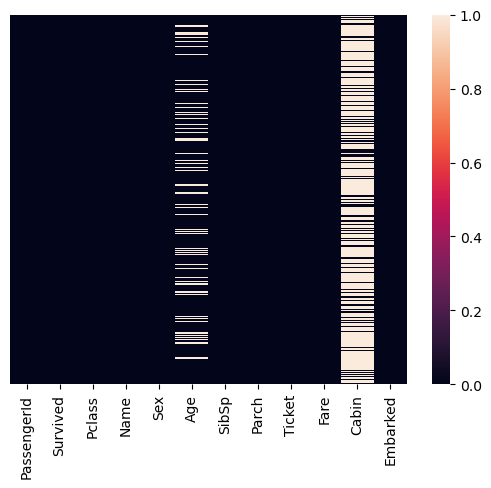

In [5]:
sns.heatmap(train_data.isnull(),yticklabels=False) 

This heatmap shows that the titanic data set have some null values in age and cabin column

<Axes: xlabel='Survived', ylabel='count'>

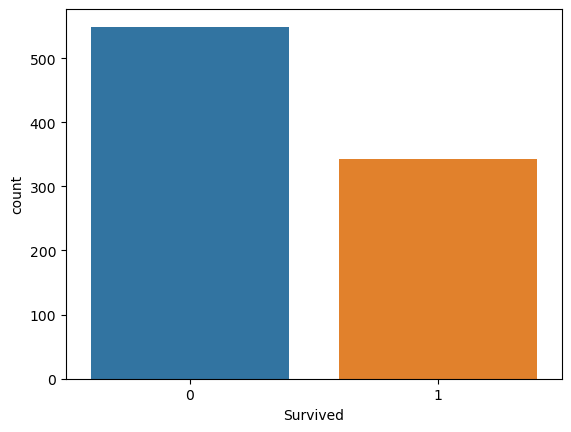

In [6]:
sns.countplot(x='Survived',data=train_data)

As we can see over here 0 implies that not survival rate is much higher than the survival rate

<Axes: xlabel='Survived', ylabel='count'>

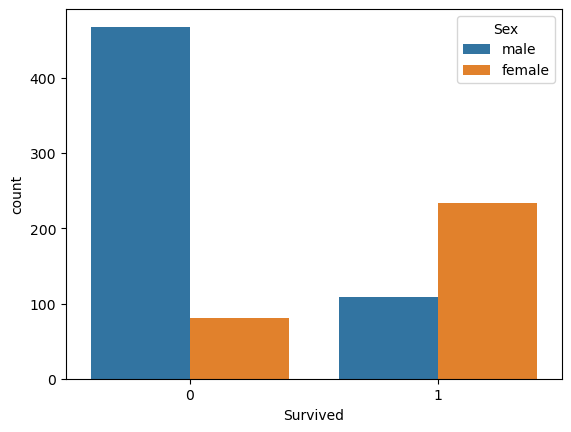

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

based on the sex the plot shows the survival(1) and not survival rate and male have the higher chance not to get survived

<Axes: xlabel='Survived', ylabel='count'>

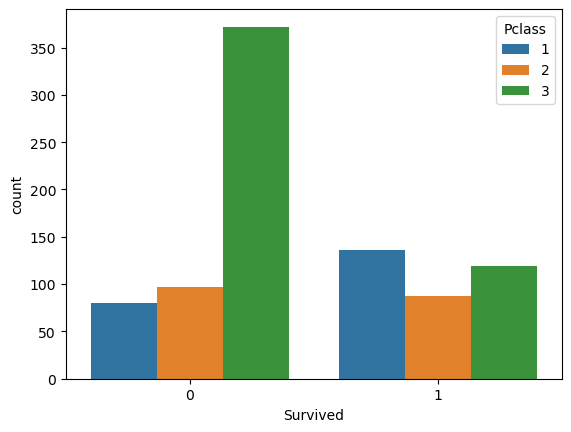

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

We can see that the 3rd class passenger have much higher chance not to get survived

C:\Users\Dell\AppData\Local\Temp\ipykernel_16364\71541759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

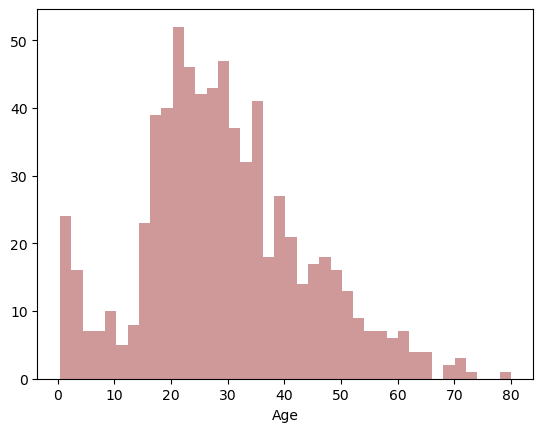

In [9]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=40)

no of people based on age follws the nornal distribution

<Axes: xlabel='SibSp', ylabel='count'>

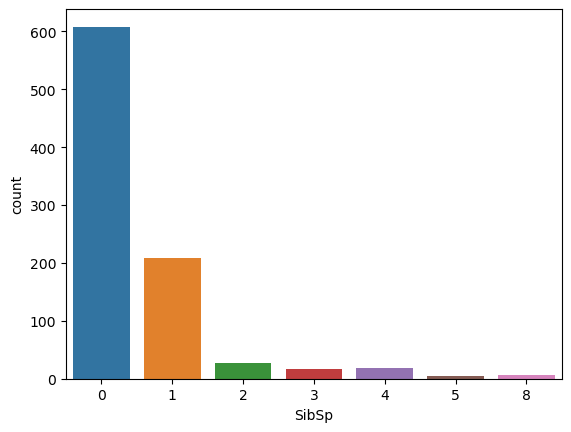

In [10]:
sns.countplot(x='SibSp',data=train_data)

maximum people who have not siblins or spouse

<Axes: >

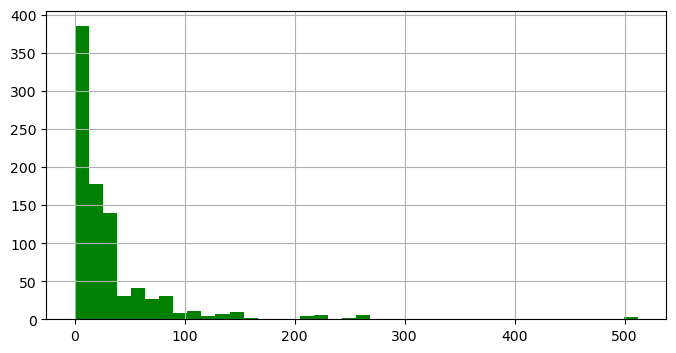

In [11]:
train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

what is the average no people who bought the ticket

___
## Data Cleaning


<Axes: xlabel='Pclass', ylabel='Age'>

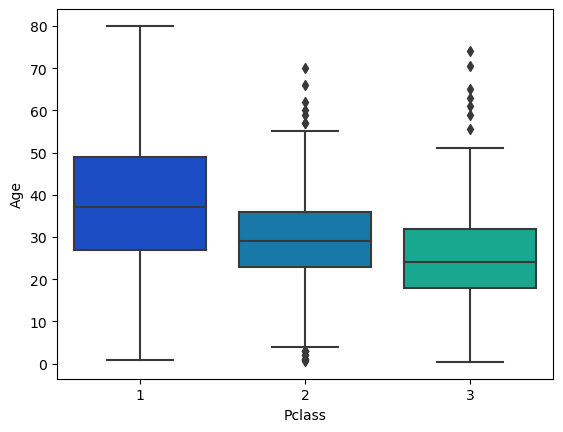

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older.

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

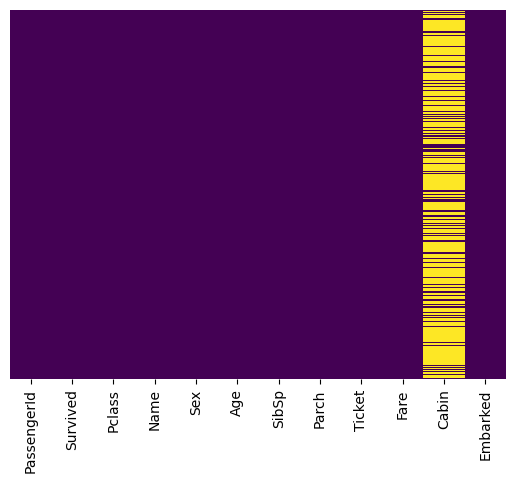

In [15]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

My age column is replace with avg pclass vlaue

In [16]:
train_data.drop('Cabin',axis=1,inplace=True)

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

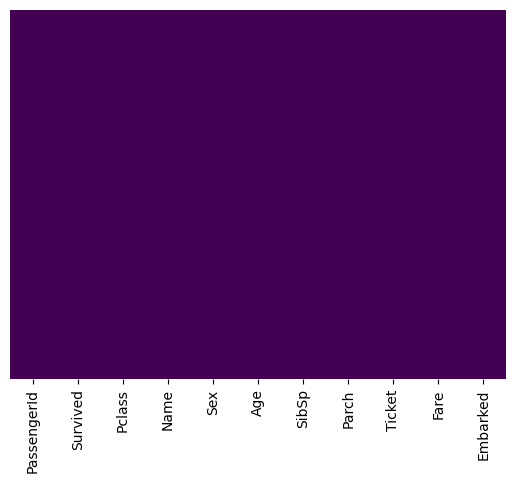

In [18]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

now the cabin column is removed so ther is no nan value

# Convert Categorical Feature

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
pd.get_dummies(train_data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Dummy variable trap

In [22]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [23]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

Drop all the column that are not required

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
train_data = pd.concat([train_data,sex,embark],axis=1)

append sex embark as they are categorical features

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
